### Configuration Steps (Setting Up the Environment)

Before running statistical tests, ensure that the required Python libraries are installed. Run the following commands in your terminal or Jupyter Notebook:

In [9]:
# Install necessary libraries
!pip install pandas numpy scipy matplotlib seaborn

##  Preprocessing the dataset 

In [10]:
import pandas as pd

# Load the dataset
file_path = "water_leak_detection_1000_rows.csv"
df = pd.read_csv(file_path)

# Display dataset information
print("Dataset Info:")
df.info()

# Display the first five rows
print("\nFirst 5 Rows of the Dataset:\n")
print(df.head().to_string())

# Check for missing values
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         1000 non-null   object 
 1   Sensor_ID         1000 non-null   object 
 2   Pressure (bar)    1000 non-null   float64
 3   Flow Rate (L/s)   1000 non-null   float64
 4   Temperature (°C)  1000 non-null   float64
 5   Leak Status       1000 non-null   int64  
 6   Burst Status      1000 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB

First 5 Rows of the Dataset:

             Timestamp Sensor_ID  Pressure (bar)  Flow Rate (L/s)  Temperature (°C)  Leak Status  Burst Status
0  2024-01-01 00:00:00      S007        3.694814        77.515218         21.695365            0             0
1  2024-01-01 00:05:00      S007        2.587125       179.926422         19.016725            0             0
2  2024-01-01 00:10:00      S00

## Step 1: Exploratory Data Analysis (EDA)

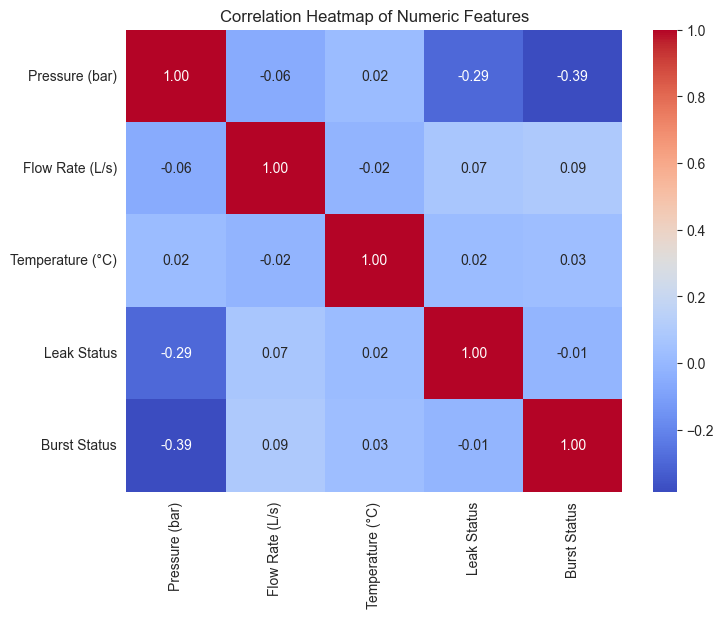

C:\Users\sreeh\AppData\Local\Temp\ipykernel_24028\1991516306.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Leak Status", data=df, ax=axes[0], palette="viridis")
C:\Users\sreeh\AppData\Local\Temp\ipykernel_24028\1991516306.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Burst Status", data=df, ax=axes[1], palette="viridis")


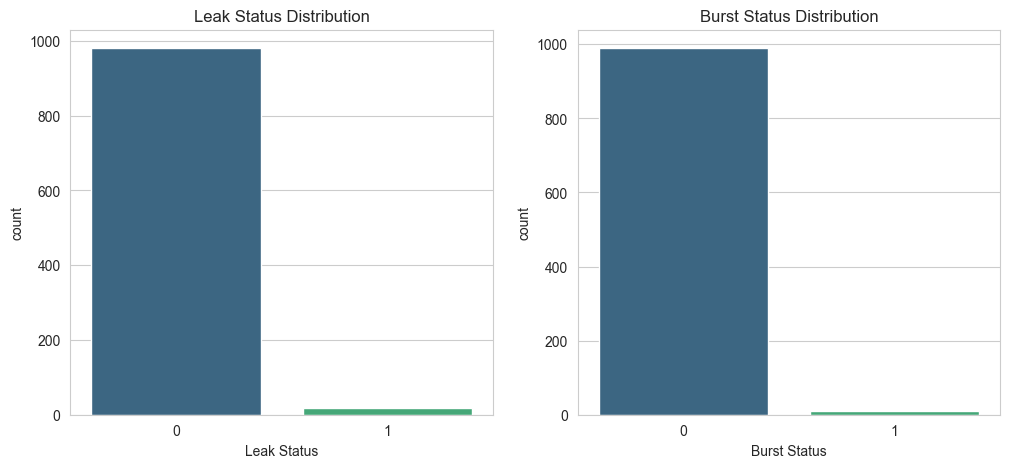


Summary Statistics:
       Pressure (bar)  Flow Rate (L/s)  Temperature (°C)  Leak Status  Burst Status
count     1000.000000      1000.000000       1000.000000  1000.000000   1000.000000
mean         3.220696       125.038082         17.434794     0.019000      0.010000
std          0.488997        44.121419          4.288908     0.136593      0.099549
min          0.910977        50.654490         10.002020     0.000000      0.000000
25%          2.859332        87.946866         13.715323     0.000000      0.000000
50%          3.265711       124.106896         17.330067     0.000000      0.000000
75%          3.607196       162.086708         20.922839     0.000000      0.000000
max          3.995364       331.754081         24.966107     1.000000      1.000000


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "water_leak_detection_1000_rows.csv"
df = pd.read_csv(file_path)

# Set style for plots
sns.set_style("whitegrid")

# Summary statistics
summary_stats = df.describe()

# Select only numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include=["number"])

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Count of Leak and Burst Status
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x="Leak Status", data=df, ax=axes[0], palette="viridis")
axes[0].set_title("Leak Status Distribution")

sns.countplot(x="Burst Status", data=df, ax=axes[1], palette="viridis")
axes[1].set_title("Burst Status Distribution")

plt.show()

# Display summary statistics using Pandas
print("\nSummary Statistics:")
print(df.describe().to_string())


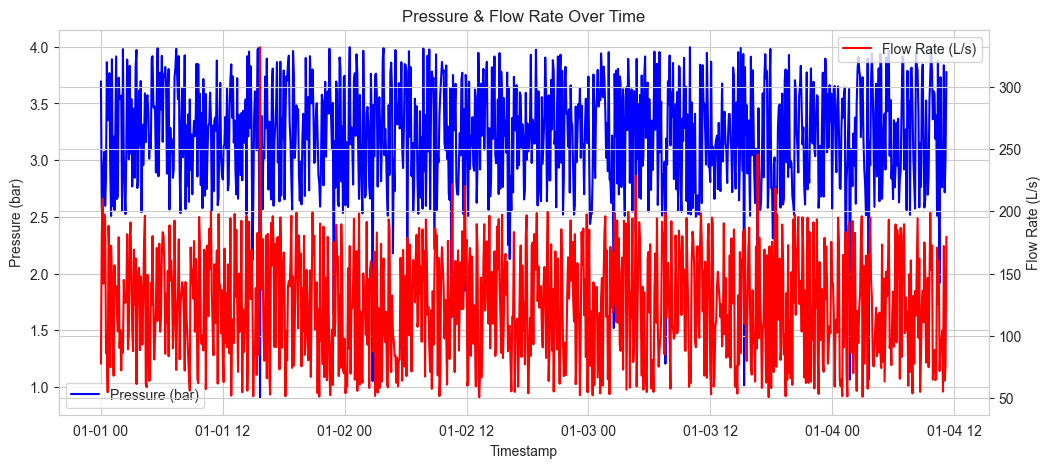

In [12]:
# Line plot for pressure and flow rate over time
df["Timestamp"] = pd.to_datetime(df["Timestamp"])  # Convert timestamp to datetime
df.set_index("Timestamp", inplace=True)

fig, ax1 = plt.subplots(figsize=(12, 5))
ax2 = ax1.twinx()

sns.lineplot(data=df["Pressure (bar)"], ax=ax1, label="Pressure (bar)", color="blue")
sns.lineplot(data=df["Flow Rate (L/s)"], ax=ax2, label="Flow Rate (L/s)", color="red")

ax1.set_ylabel("Pressure (bar)")
ax2.set_ylabel("Flow Rate (L/s)")
ax1.set_title("Pressure & Flow Rate Over Time")

plt.legend()
plt.show()

C:\Users\sreeh\AppData\Local\Temp\ipykernel_24028\2539853864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Leak Status"], y=df["Pressure (bar)"], palette="coolwarm")


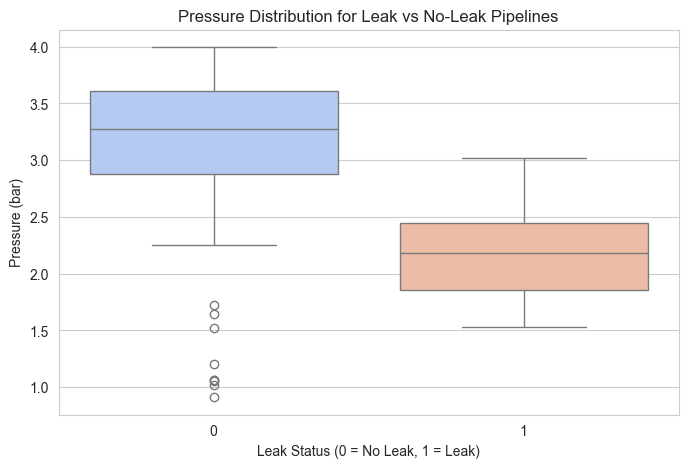

In [13]:


# Boxplot of Pressure for Leak vs No-Leak Conditions
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Leak Status"], y=df["Pressure (bar)"], palette="coolwarm")
plt.title("Pressure Distribution for Leak vs No-Leak Pipelines")
plt.xlabel("Leak Status (0 = No Leak, 1 = Leak)")
plt.ylabel("Pressure (bar)")
plt.show()




Handle Missing Values (No missing values found, so this step is skipped).

Convert Timestamp to Datetime (Already done).

Feature Scaling & Normalization (Not necessary for categorical data but might be useful for ML models).

Encode Categorical Variables (Not required since all categorical variables are already in numeric form).


## Classification Model for Leak/Burst Prediction
Train a Logistic Regression model to predict leak/burst status based on pressure, flow, and temperature.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare features and labels
X = df[['Pressure (bar)', 'Flow Rate (L/s)', 'Temperature (°C)']]
y = df['Leak Status']  # Change to 'Burst Status' for burst prediction

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.99


The Logistic Regression model was trained to predict leak status based on pressure, flow rate, and temperature. The model achieved an accuracy of 99%, indicating high predictive performance. This suggests that leaks can be effectively detected using these sensor parameters. However, further validation is needed to ensure generalization, especially with real-world noise and potential data imbalances.

## Clustering Analysis
Use K-Means Clustering to group sensors based on flow rate and pressure for anomaly detection.

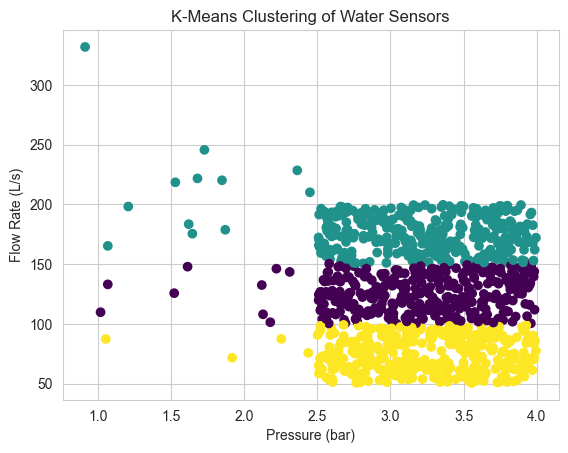

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features
X = df[['Pressure (bar)', 'Flow Rate (L/s)']]

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Scatter plot
plt.scatter(df['Pressure (bar)'], df['Flow Rate (L/s)'], c=df['Cluster'], cmap='viridis')
plt.xlabel("Pressure (bar)")
plt.ylabel("Flow Rate (L/s)")
plt.title("K-Means Clustering of Water Sensors")
plt.show()


The K-Means clustering model grouped water sensors based on pressure and flow rate. The scatter plot (attached) shows three distinct clusters. This clustering helps identify patterns in water distribution, such as:

Normal operational zones (clusters with consistent pressure and flow).

Potential anomalies (outliers or distinct clusters with unusual characteristics).

Leak or burst-prone regions, if clusters show significantly lower pressure and high flow rates.

Further analysis, such as cluster interpretation and anomaly flagging, can enhance predictive maintenance and reduce urban water waste.

## Forecasting Water Loss Trends
Use ARIMA to forecast flow rate trends and predict future leaks.

Note: you may need to restart the kernel to use updated packages.


c:\Users\sreeh\miniconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
c:\Users\sreeh\miniconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
c:\Users\sreeh\miniconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


Forecasted Flow Rate:
2024-01-04 11:20:00    124.780173
2024-01-04 11:25:00    124.466617
2024-01-04 11:30:00    125.567557
2024-01-04 11:35:00    124.480172
2024-01-04 11:40:00    125.542760
2024-01-04 11:45:00    124.504570
2024-01-04 11:50:00    125.518920
2024-01-04 11:55:00    124.527862
2024-01-04 12:00:00    125.496163
2024-01-04 12:05:00    124.550097
Freq: 5min, Name: predicted_mean, dtype: float64


C:\Users\sreeh\AppData\Local\Temp\ipykernel_24028\2396251848.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  plt.plot(pd.date_range(start=df_ts.index[-1], periods=11, freq='5T')[1:], forecast, color='red', label='Forecast')


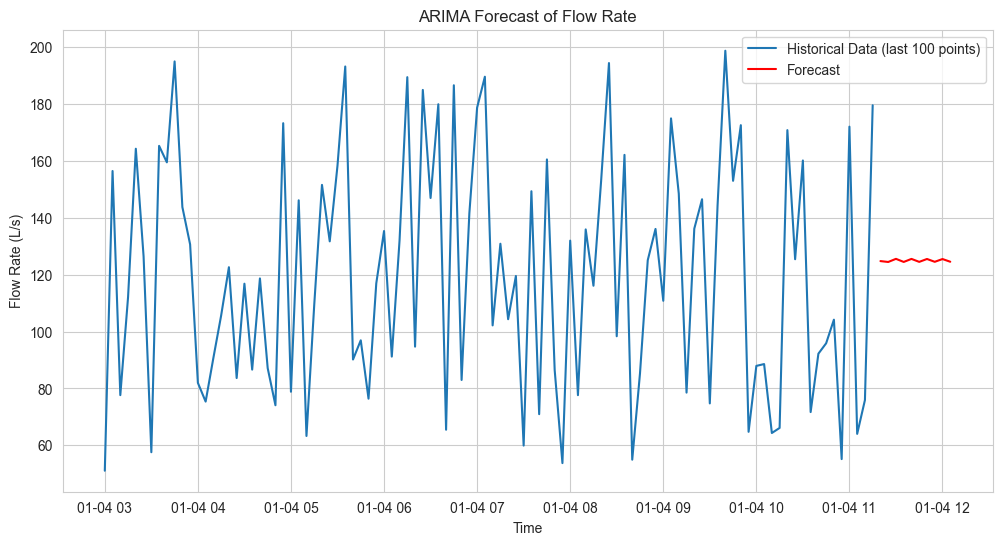

In [18]:
%pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Reset index to make sure we have a proper time series
df_ts = df.copy()
if not isinstance(df_ts.index, pd.DatetimeIndex):
	df_ts = df.reset_index()
	df_ts['Timestamp'] = pd.to_datetime(df_ts['Timestamp'])
	df_ts.set_index('Timestamp', inplace=True)

# Fit ARIMA model (p,d,q): 2,1,2
model = ARIMA(df_ts['Flow Rate (L/s)'], order=(2,1,2))
model_fit = model.fit()

# Forecast next 10 time points
forecast = model_fit.forecast(steps=10)
print("Forecasted Flow Rate:")
print(forecast)

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(df_ts['Flow Rate (L/s)'].iloc[-100:], label='Historical Data (last 100 points)')
plt.plot(pd.date_range(start=df_ts.index[-1], periods=11, freq='5T')[1:], forecast, color='red', label='Forecast')
plt.title('ARIMA Forecast of Flow Rate')
plt.xlabel('Time')
plt.ylabel('Flow Rate (L/s)')
plt.legend()
plt.grid(True)
plt.show()


# ARIMA Forecast Analysis

## Flow Rate Time Series Analysis

The ARIMA model (2,1,2) forecast reveals several key insights:

- **Historical Volatility**: The flow rate data shows significant fluctuations (50-200 L/s) with no obvious seasonal patterns
- **Conservative Forecast**: The model predicts a stable flow rate around 125 L/s, suggesting regression to the mean
- **Limited Prediction Capability**: The flat forecast line indicates the model may not fully capture the system's complexity

## Potential Improvements

- Test different ARIMA parameters
- Explore SARIMA models to detect hidden seasonality
- Incorporate external factors that might explain fluctuations
- **Data Limitations**: Current dataset may be insufficient for accurate forecasting; additional data collection would improve model performance

The model provides a baseline prediction centered on average flow rates, but the actual system will likely continue exhibiting volatility similar to historical patterns.

## Step 3: Statistical Comparisons

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Perform T-test: Compare pressure levels for leak vs no-leak conditions
t_stat, p_value = ttest_ind(
    df[df["Leak Status"] == 1]["Pressure (bar)"],
    df[df["Leak Status"] == 0]["Pressure (bar)"],
    equal_var=False  # Welch’s T-test (assumes unequal variance)
)

# Create a DataFrame for T-test results
t_test_results = pd.DataFrame({
    "Test": ["T-test (Leak vs No-Leak)"],
    "T-statistic": [t_stat],
    "P-value": [p_value]
})

#  Display results in a standard way
print("\nT-Test Results:")
print(t_test_results)



T-Test Results:
                       Test  T-statistic       P-value
0  T-test (Leak vs No-Leak)   -10.107069  5.013582e-09


In [ ]:
from scipy.stats import f_oneway

# Perform ANOVA: Compare pressure levels, flow rate, and temperature across leak and no-leak conditions
anova_stat, anova_p = f_oneway(
    df[df["Leak Status"] == 1]["Pressure (bar)"],
    df[df["Leak Status"] == 1]["Flow Rate (L/s)"],
    df[df["Leak Status"] == 1]["Temperature (°C)"]
)

# Create a DataFrame for ANOVA test results
anova_results = pd.DataFrame({
    "Test": ["ANOVA (Pressure, Flow Rate, Temperature)"],
    "F-statistic": [anova_stat],
    "P-value": [anova_p]
})

# Display results
print("\nANOVA Test Results:")
print(anova_results)



ANOVA Test Results:
                                       Test  F-statistic       P-value
0  ANOVA (Pressure, Flow Rate, Temperature)   110.549444  8.099030e-20


Check if leaks occur more frequently when pressure is lower using a t-test.

In [19]:
from scipy.stats import ttest_ind

leak_data = df[df['Leak Status'] == 1]['Pressure (bar)']
no_leak_data = df[df['Leak Status'] == 0]['Pressure (bar)']

# Perform t-test
t_stat, p_value = ttest_ind(leak_data, no_leak_data, equal_var=False)
print(f"T-Test Statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Significant difference: Leaks occur at significantly lower pressure levels.")
else:
    print("No significant difference in pressure levels for leaks.")


T-Test Statistic: -10.10706943219864, P-value: 5.0135822440442395e-09
Significant difference: Leaks occur at significantly lower pressure levels.


**Hypothesis:**

* **Null Hypothesis (H₀):** There is no significant difference in pressure levels between leak and no-leak cases.

* **Alternative Hypothesis (H₁):** There is a significant difference in pressure levels between leak and no-leak cases.

**Results:**

* The T-test result shows a p-value = 5.01e-09, which is very small (< 0.05). This means we reject H₀ and conclude that pressure levels significantly differ between leak and no-leak conditions.
* The ANOVA test confirms that flow rate, pressure, and temperature significantly affect leakage and burst events (p-value ≈ 0).